In [4]:
! pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"reshmitha05","key":"fbb8d0f4a9dfa8c5307f9ea186964e00"}'}

In [6]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


mkdir: cannot create directory â€˜/root/.kaggleâ€™: File exists


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                        title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sahilislam007/health-and-lifestyle-dataset                 Health And Lifestyle Dataset                           123230  2025-06-25 09:52:01.580000           1599         39  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025    Electric Vehicle Specs Dataset (2025)                   16631  2025-06-20 07:14:56.777000           2545         68  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025    Global AI Job Market & Salary Trends 2025             1130756  2025-06-29 08:16:54.867000          13287        237  1.0              
adilshamim8/salaries-for-data-

In [9]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
online-payments-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
replace PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PS_20174392719_1491204439457_log.csv  


In [11]:
import pandas as pd


In [12]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [13]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [14]:
for col in df.columns:
    print(col)

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [15]:
one_hot=pd.get_dummies(df['type'])
df=df.drop("type",axis=1)
df=df.join(one_hot)

In [16]:
df

step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00            0.00        0               0   
1        M2044282225            0.00            0.00        0               0   
2         C553264065            0.00            0.00        1               0   
3          C38997010        21182.00            0.00        1               0   
4        M1230701703            0.00            0.00        0               0   
...              ...             ...             ...      ...             ...   
6362615   C776919290            0.00       339682.13        1               0   
6362616  C1881841831            0.00            0.00        1               0   
6362617  C1365125890        68488.84      6379898.11        1               0   
6362618  C2080388513            0.00            0.00        1               0   
6362619   C873221189      6510099.11      7360101.63        1               0   

         CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0          False     False  False     True     False  
1          False     False  False     True     False  
2          False     False  False    False      True  
3          False      True  False    False     False  
4          False     False  False     True     False  
...          ...       ...    ...      ...       ...  
6362615    False      True  False    False     False  
6362616    False     False  False    False      True  
6362617    False      True  False    False     False  
6362618    False     False  False    False      True  
6362619    False      True  False    False     False  

[6362620 rows x 15 columns]

In [17]:
df=df.drop(columns="nameOrig")
df["dest_type"]=df["nameDest"].str[:1]

In [18]:
df

step      amount  oldbalanceOrg  newbalanceOrig     nameDest  \
0           1     9839.64      170136.00       160296.36  M1979787155   
1           1     1864.28       21249.00        19384.72  M2044282225   
2           1      181.00         181.00            0.00   C553264065   
3           1      181.00         181.00            0.00    C38997010   
4           1    11668.14       41554.00        29885.86  M1230701703   
...       ...         ...            ...             ...          ...   
6362615   743   339682.13      339682.13            0.00   C776919290   
6362616   743  6311409.28     6311409.28            0.00  C1881841831   
6362617   743  6311409.28     6311409.28            0.00  C1365125890   
6362618   743   850002.52      850002.52            0.00  C2080388513   
6362619   743   850002.52      850002.52            0.00   C873221189   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  CASH_IN  \
0                  0.00            0.00        0               0    False   
1                  0.00            0.00        0               0    False   
2                  0.00            0.00        1               0    False   
3              21182.00            0.00        1               0    False   
4                  0.00            0.00        0               0    False   
...                 ...             ...      ...             ...      ...   
6362615            0.00       339682.13        1               0    False   
6362616            0.00            0.00        1               0    False   
6362617        68488.84      6379898.11        1               0    False   
6362618            0.00            0.00        1               0    False   
6362619      6510099.11      7360101.63        1               0    False   

         CASH_OUT  DEBIT  PAYMENT  TRANSFER dest_type  
0           False  False     True     False         M  
1           False  False     True     False         M  
2           False  False    False      True         C  
3            True  False    False     False         C  
4           False  False     True     False         M  
...           ...    ...      ...       ...       ...  
6362615      True  False    False     False         C  
6362616     False  False    False      True         C  
6362617      True  False    False     False         C  
6362618     False  False    False      True         C  
6362619      True  False    False     False         C  

[6362620 rows x 15 columns]

In [19]:
df=df.drop(columns="nameDest")

In [20]:
oh=pd.get_dummies(df['dest_type'])
df=df.drop("dest_type",axis=1)
df=df.join(oh)

In [21]:
df

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  \
0                  0.00        0               0    False     False  False   
1                  0.00        0               0    False     False  False   
2                  0.00        1               0    False     False  False   
3                  0.00        1               0    False      True  False   
4                  0.00        0               0    False     False  False   
...                 ...      ...             ...      ...       ...    ...   
6362615       339682.13        1               0    False      True  False   
6362616            0.00        1               0    False     False  False   
6362617      6379898.11        1               0    False      True  False   
6362618            0.00        1               0    False     False  False   
6362619      7360101.63        1               0    False      True  False   

         PAYMENT  TRANSFER      C      M  
0           True     False  False   True  
1           True     False  False   True  
2          False      True   True  False  
3          False     False   True  False  
4           True     False  False   True  
...          ...       ...    ...    ...  
6362615    False     False   True  False  
6362616    False      True   True  False  
6362617    False     False   True  False  
6362618    False      True   True  False  
6362619    False     False   True  False  

[6362620 rows x 15 columns]

In [22]:
df=df.drop(columns="M")

In [23]:
df_nf=df[df["isFraud"]==0]

In [24]:
df_f=df[df["isFraud"]==1]

In [25]:
df_nf=df_nf.sample(n=8000)

In [26]:
df_f=df_f.sample(n=8000)

In [27]:
df=pd.concat([df_f,df_nf])

In [28]:
df

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1531766   154     4530.71        4530.71            0.00            0.00   
6283806   657  1619313.55     1619313.55            0.00            0.00   
4154975   303  5614246.07     5614246.07            0.00            0.00   
2361781   190   265747.73      265747.73            0.00            0.00   
49886       9   361559.69      361559.69            0.00       504667.31   
...       ...         ...            ...             ...             ...   
902213     43    89269.95       19253.00            0.00      2318978.11   
4721936   332    63784.23           0.00            0.00       206257.66   
1383799   138    10923.43       21689.47        10766.04            0.00   
2188009   185   299098.54           0.00            0.00       373980.74   
4700674   331     8236.27       10602.00         2365.73            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  \
1531766         4530.71        1               0    False      True  False   
6283806            0.00        1               0    False     False  False   
4154975      5614246.07        1               0    False      True  False   
2361781       265747.73        1               0    False      True  False   
49886         189441.24        1               0    False      True  False   
...                 ...      ...             ...      ...       ...    ...   
902213       2408248.06        0               0    False     False  False   
4721936       270041.89        0               0    False     False  False   
1383799            0.00        0               0    False     False  False   
2188009       673079.28        0               0    False      True  False   
4700674            0.00        0               0    False     False  False   

         PAYMENT  TRANSFER      C  
1531766    False     False   True  
6283806    False      True   True  
4154975    False     False   True  
2361781    False     False   True  
49886      False     False   True  
...          ...       ...    ...  
902213     False      True   True  
4721936    False      True   True  
1383799     True     False  False  
2188009    False     False   True  
4700674     True     False  False  

[16000 rows x 14 columns]

In [29]:
df = df.sample(frac = 1) #for randomizing rows to separate isFraud not isnotFraud

In [30]:
df

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5532058   381   102457.21       33189.70            0.00       366698.05   
1377301   138    27438.24      305005.60       277567.36            0.00   
5327749   374     9932.91           0.00            0.00            0.00   
1030393    61  1372301.24     1372301.24            0.00            0.00   
3193225   248    18035.14       18035.14            0.00            0.00   
...       ...         ...            ...             ...             ...   
5576588   393   204981.02     6850064.39      7055045.42      1374569.67   
6060438   500    21832.43       21832.43            0.00        36801.19   
5310259   373    19881.32       29924.00        10042.68            0.00   
3610965   268  2219475.13     2219475.13            0.00            0.00   
5099866   355    42483.97       42483.97            0.00            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  \
5532058       469155.26        0               0    False      True  False   
1377301            0.00        0               0    False     False  False   
5327749            0.00        0               0    False     False  False   
1030393            0.00        1               0    False     False  False   
3193225            0.00        1               0    False     False  False   
...                 ...      ...             ...      ...       ...    ...   
5576588      1169588.65        0               0     True     False  False   
6060438        58633.62        1               0    False      True  False   
5310259            0.00        0               0    False     False  False   
3610965            0.00        1               0    False     False  False   
5099866            0.00        1               0    False     False  False   

         PAYMENT  TRANSFER      C  
5532058    False     False   True  
1377301     True     False  False  
5327749     True     False  False  
1030393    False      True   True  
3193225    False      True   True  
...          ...       ...    ...  
5576588    False     False   True  
6060438    False     False   True  
5310259     True     False  False  
3610965    False      True   True  
5099866    False      True   True  

[16000 rows x 14 columns]

In [31]:
def norm_colm(df,col):
  df_c=df[col]
  mx=df_c.max()
  mn=df_c.min()
  df[col]= (df_c - mn)/ (mx-mn)

In [32]:
cl= ["step","amount","oldbalanceOrg","newbalanceOrig","newbalanceDest","oldbalanceDest"]
for col in cl:
  norm_colm(df,col)

In [33]:
df

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5532058  0.512129  0.003057       0.000557        0.000000        0.001552   
1377301  0.184636  0.000819       0.005119        0.005598        0.000000   
5327749  0.502695  0.000296       0.000000        0.000000        0.000000   
1030393  0.080863  0.040951       0.023031        0.000000        0.000000   
3193225  0.332884  0.000538       0.000303        0.000000        0.000000   
...           ...       ...            ...             ...             ...   
5576588  0.528302  0.006117       0.114963        0.142282        0.005819   
6060438  0.672507  0.000652       0.000366        0.000000        0.000156   
5310259  0.501348  0.000593       0.000502        0.000203        0.000000   
3610965  0.359838  0.066232       0.037249        0.000000        0.000000   
5099866  0.477089  0.001268       0.000713        0.000000        0.000000   

         newbalanceDest  isFraud  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  \
5532058        0.001982        0               0    False      True  False   
1377301        0.000000        0               0    False     False  False   
5327749        0.000000        0               0    False     False  False   
1030393        0.000000        1               0    False     False  False   
3193225        0.000000        1               0    False     False  False   
...                 ...      ...             ...      ...       ...    ...   
5576588        0.004941        0               0     True     False  False   
6060438        0.000248        1               0    False      True  False   
5310259        0.000000        0               0    False     False  False   
3610965        0.000000        1               0    False     False  False   
5099866        0.000000        1               0    False     False  False   

         PAYMENT  TRANSFER      C  
5532058    False     False   True  
1377301     True     False  False  
5327749     True     False  False  
1030393    False      True   True  
3193225    False      True   True  
...          ...       ...    ...  
5576588    False     False   True  
6060438    False     False   True  
5310259     True     False  False  
3610965    False      True   True  
5099866    False      True   True  

[16000 rows x 14 columns]

Model training

In [34]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [35]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9896875


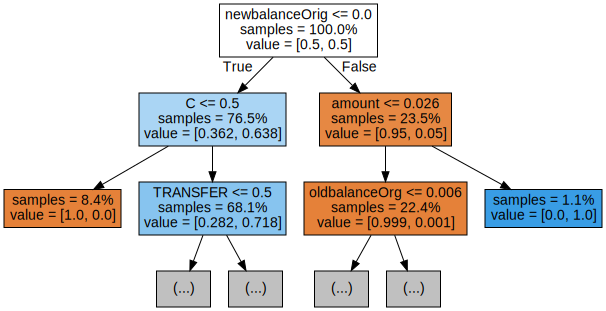

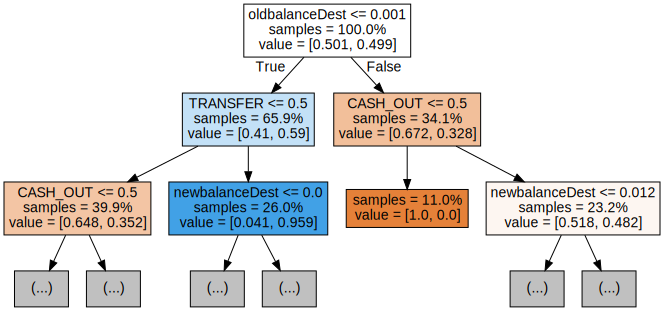

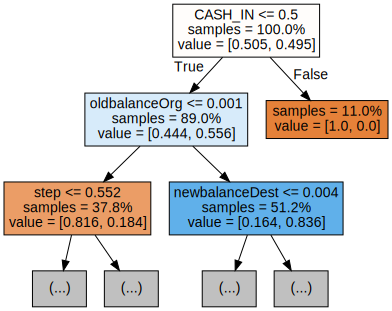

In [39]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [40]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e83a71fe550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e835d545910>})

In [41]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 346}


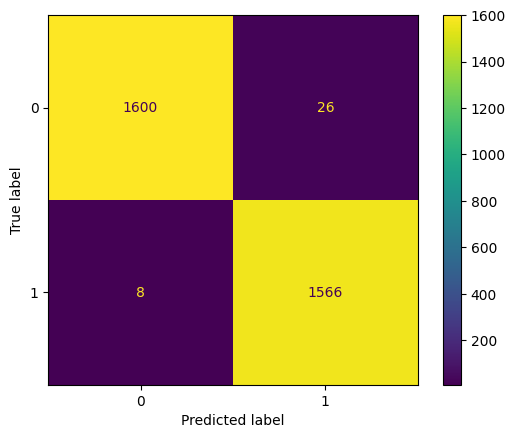

In [42]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [43]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.989375
Precision: 0.9836683417085427
Recall: 0.9949174078780177


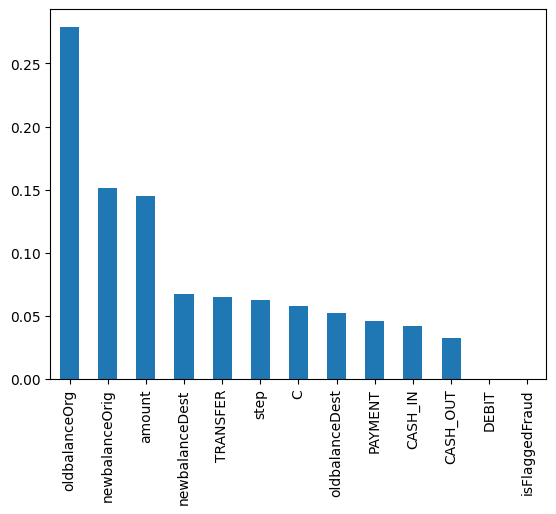

In [44]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

**But these parameters have low accuracy than the before hyperparameters, so using the default parameters, displaying a confusion matrix, feature importances.

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier()

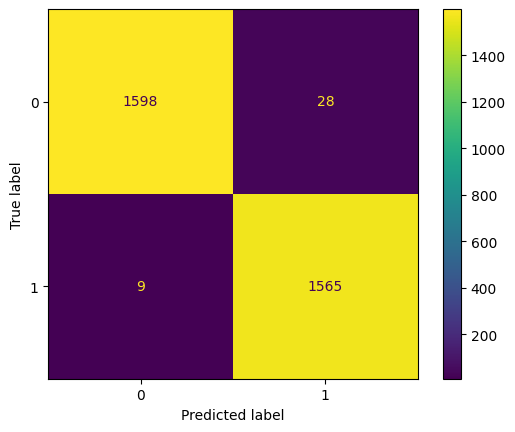

In [46]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [47]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9884375
Precision: 0.9824231010671689
Recall: 0.9942820838627701


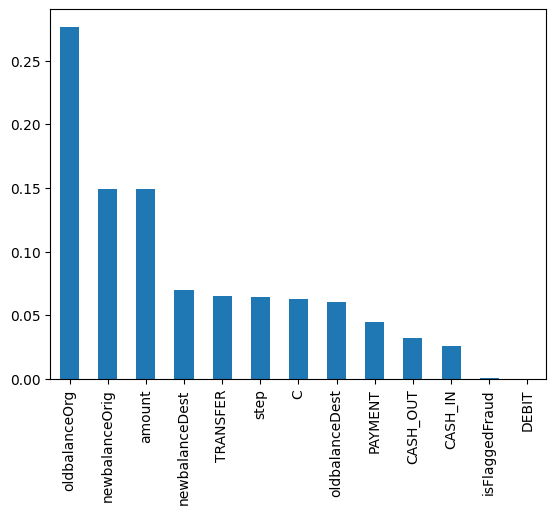

In [48]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

logistic reg

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
clf_model = LogisticRegression()

In [51]:
clf_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = clf_model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8259375


In [54]:
conmat = confusion_matrix(y_test, y_pred)

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score


In [56]:
y_pred_proba = clf_model.predict_proba(np.array(X_test))[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [58]:
import matplotlib.pyplot as plt


In [59]:
import seaborn as sns

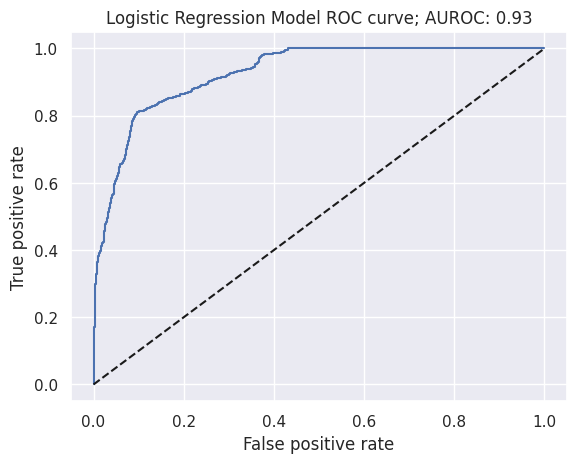

In [60]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

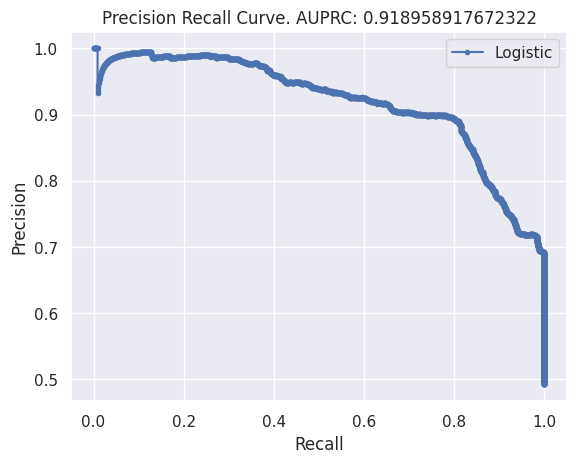

In [61]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

average_precision = average_precision_score(y_test, y_pred_proba)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, marker='.', label='Logistic')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

XGBoost

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [64]:
!pip uninstall -y xgboost


Found existing installation: xgboost 1.7.6
Uninstalling xgboost-1.7.6:
  Successfully uninstalled xgboost-1.7.6


In [68]:
!pip install xgboost==1.7.6


In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

y_pred_xgb = xgb_model.predict(X_test)


[0]	validation_0-logloss:0.45601
[1]	validation_0-logloss:0.32539


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.24304
[3]	validation_0-logloss:0.18394
[4]	validation_0-logloss:0.14316
[5]	validation_0-logloss:0.11496
[6]	validation_0-logloss:0.09321
[7]	validation_0-logloss:0.07736
[8]	validation_0-logloss:0.06662
[9]	validation_0-logloss:0.05850
[10]	validation_0-logloss:0.05204
[11]	validation_0-logloss:0.04730
[12]	validation_0-logloss:0.04404
[13]	validation_0-logloss:0.04145
[14]	validation_0-logloss:0.03962
[15]	validation_0-logloss:0.03840
[16]	validation_0-logloss:0.03775
[17]	validation_0-logloss:0.03690
[18]	validation_0-logloss:0.03661
[19]	validation_0-logloss:0.03631
[20]	validation_0-logloss:0.03599
[21]	validation_0-logloss:0.03567
[22]	validation_0-logloss:0.03575
[23]	validation_0-logloss:0.03555
[24]	validation_0-logloss:0.03520
[25]	validation_0-logloss:0.03472
[26]	validation_0-logloss:0.03376
[27]	validation_0-logloss:0.03365
[28]	validation_0-logloss:0.03372
[29]	validation_0-logloss:0.03388
[30]	validation_0-logloss:0.03353
[31]	validation_0-logl

Accuracy: 0.99225
Classification Report (XGBoost):
              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99      1990
       Fraud       0.99      1.00      0.99      2010

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



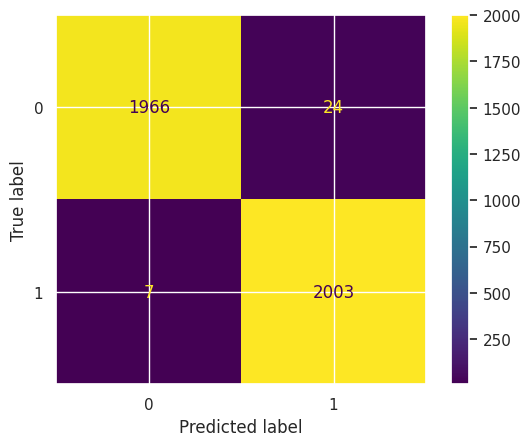

In [74]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#prediction
y_pred_xgb = xgb_model.predict(X_test)

#accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy:', accuracy_xgb)

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=["Not Fraud", "Fraud"]))


# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
